![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
import tensorflow
tensorflow.__version__

'2.3.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Change current working directory to project folder (2 mark)

In [3]:
#### Add your code here ####
import os
os.chdir('./drive/My Drive/AI/ACV/')

In [4]:
os.getcwd()

'/content/drive/My Drive/AI/ACV'

### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
!cp '/content/drive/My Drive/AI/ACV/ACV-Project-2 Datatset/Aligned Face Dataset.zip' .

In [8]:
#### Add your code here ####
!unzip Aligned\ Face\ Dataset.zip && rm Aligned\ Face\ Dataset.zip

Archive:  Aligned Face Dataset.zip
replace PINS/pins_Aaron Paul/Aaron Paul0_262.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [5]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [6]:
metadata[0]

PINS/pins_Aaron Paul/Aaron Paul129_259.jpg

In [7]:
targets = np.array([m.name for m in metadata])
targets

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

Text(0.5, 1.0, 'pins_Jon Bernthal')

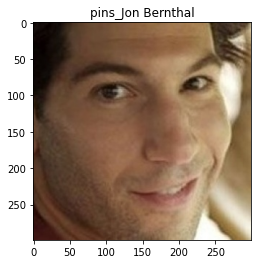

In [69]:
import matplotlib.pyplot as plt
no = np.random.randint(0,metadata.shape[0])
img = load_image("{}".format(metadata[no]))
plt.imshow(img)
plt.title(targets[no])

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [11]:
model = vgg_face()
model.load_weights('/content/drive/My Drive/AI/ACV/ACV-Project-2 Datatset/vgg_face_weights.h5')
model.summary()#### Add your code here ####
#### Add your code here ####

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [12]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [13]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


In [14]:
embedding_vector

array([ 0.01292649, -0.00900512,  0.00703634, ..., -0.01452406,
       -0.00115604,  0.00338774], dtype=float32)

### Generate embeddings for all images (10 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [15]:
embeddings = []
for i, m in enumerate(metadata):

  img = load_image("{}".format(m))

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)
  print(img.shape)
  img = cv2.resize(img, dsize = (224,224))
  print(img.shape)

  preds = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  embeddings.append(preds)

Streaming output truncated to the last 5000 lines.
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 3)
(224, 224, 3)
(299, 299, 

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [16]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

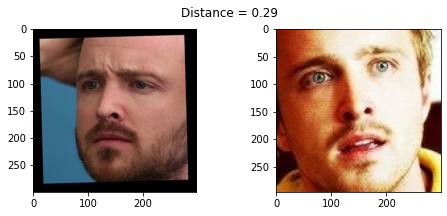

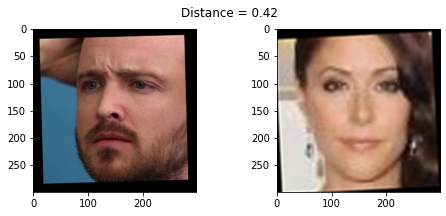

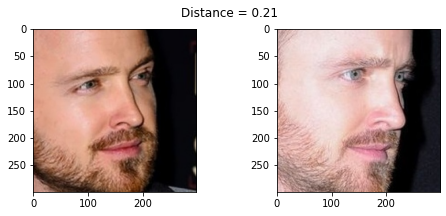

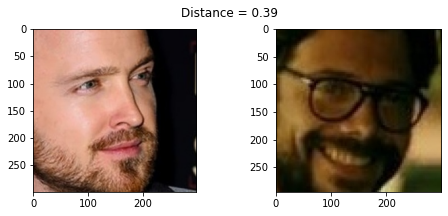

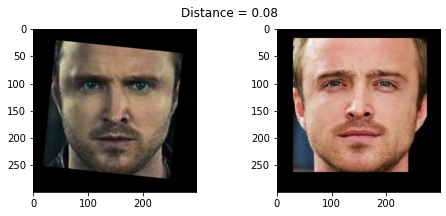

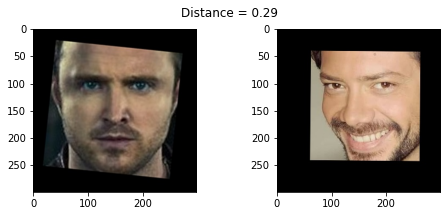

In [17]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)
show_pair(30, 31)
show_pair(30,100)
show_pair(70, 72)
show_pair(70,115)

### Create train and test sets (10 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [38]:
X_train = []
X_test = []
y_train = []
y_test = []
trn_idx = []
tst_idx = []
for i in range(len(embeddings)):
  if i % 9 != 0:
    print("Train=>",i)
    X_train.append(embeddings[i])
    y_train.append(targets[i])
    trn_idx.append(i)
  else:
    print("test=>",i)
    X_test.append(embeddings[i])
    y_test.append(targets[i])
    tst_idx.append(i)

Streaming output truncated to the last 5000 lines.
Train=> 5771
Train=> 5772
Train=> 5773
Train=> 5774
Train=> 5775
Train=> 5776
Train=> 5777
test=> 5778
Train=> 5779
Train=> 5780
Train=> 5781
Train=> 5782
Train=> 5783
Train=> 5784
Train=> 5785
Train=> 5786
test=> 5787
Train=> 5788
Train=> 5789
Train=> 5790
Train=> 5791
Train=> 5792
Train=> 5793
Train=> 5794
Train=> 5795
test=> 5796
Train=> 5797
Train=> 5798
Train=> 5799
Train=> 5800
Train=> 5801
Train=> 5802
Train=> 5803
Train=> 5804
test=> 5805
Train=> 5806
Train=> 5807
Train=> 5808
Train=> 5809
Train=> 5810
Train=> 5811
Train=> 5812
Train=> 5813
test=> 5814
Train=> 5815
Train=> 5816
Train=> 5817
Train=> 5818
Train=> 5819
Train=> 5820
Train=> 5821
Train=> 5822
test=> 5823
Train=> 5824
Train=> 5825
Train=> 5826
Train=> 5827
Train=> 5828
Train=> 5829
Train=> 5830
Train=> 5831
test=> 5832
Train=> 5833
Train=> 5834
Train=> 5835
Train=> 5836
Train=> 5837
Train=> 5838
Train=> 5839
Train=> 5840
test=> 5841
Train=> 5842
Train=> 5843
Train=> 

### Encode the Labels (6 marks)
- Encode the targets
- Use LabelEncoder

In [19]:
x_tr_arr = np.array(X_train)
y_tr_arr = np.array(y_train)
x_ts_arr = np.array(X_test)
y_ts_arr = np.array(y_test)

In [20]:
print("Shape of x train =>",x_tr_arr.shape)
print("Shape of y train =>",y_tr_arr.shape)
print("Shape of x test =>",x_ts_arr.shape)
print("Shape of y test =>",y_ts_arr.shape)

Shape of x train => (9573, 2622)
Shape of y train => (9573,)
Shape of x test => (1197, 2622)
Shape of y test => (1197,)


In [21]:
type(x_tr_arr)

numpy.ndarray

In [22]:
y_tr_arr

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

In [23]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
y_tr_enc = lenc.fit_transform(y_tr_arr)
y_ts_enc = lenc.fit_transform(y_ts_arr)

In [24]:
np.unique(y_tr_enc)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

### Standardize the feature values (6 marks)
- Scale the features using StandardScaler

In [25]:
# Standarize features
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_tr_enc = std.fit_transform(x_tr_arr)
x_ts_enc = std.fit_transform(x_ts_arr)


### Reduce dimensions using PCA (6 marks)
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=128)
pca.fit(x_tr_enc)

In [28]:
x_tr_pca = pca.transform(x_tr_enc)
x_ts_pca = pca.transform(x_ts_enc)

### Build a Classifier (6 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [29]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_tr_pca,y_tr_enc)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
svc.score(x_tr_pca,y_tr_enc)

0.9962394233782513

In [33]:
svc.score(x_ts_pca,y_ts_enc)

0.9598997493734336

In [67]:
from sklearn.metrics import accuracy_score,classification_report
y_pred = svc.predict(x_ts_pca)
cls_rep = classification_report(y_ts_enc,y_pred)
acc = accuracy_score(y_ts_enc,y_pred)
print("The accuracy is "+str(acc*100)+"%")
print("The classification report is =>\n",cls_rep)

The accuracy is 95.98997493734336%
The classification report is =>
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.83      1.00      0.91        10
           2       0.93      1.00      0.96        13
           3       1.00      1.00      1.00        13
           4       1.00      0.86      0.92         7
           5       1.00      0.78      0.88         9
           6       1.00      0.88      0.93         8
           7       0.93      1.00      0.97        14
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         9
          10       0.92      0.85      0.88        13
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00         9
          13       0.75      0.90      0.82        10
          14       0.94      1.00      0.97        16
          15       1.00      0.93      0.96        14
          16 

### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

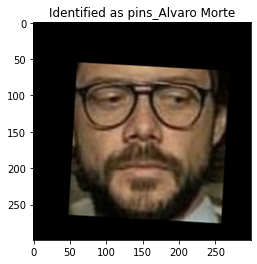

In [60]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[tst_idx][example_idx].image_path())
example_prediction = svc.predict(x_ts_pca[example_idx].reshape(1,-1))
example_identity = lenc.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');